# gradient descent for regression
以下に示す gradient discentの更新式をpythonで書いてみる

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i))}\right)x_j^{(i)}$  (simultaneously update $\theta_j$ for all $j$).

- $m$: num of data

## listを使った場合(numpyを使わない場合)

In [8]:
# settings
m = 3
theta = [1.0, 1.0]
x = [[1, 2], [3, 5], [4, 3]]
y = [100, 400, 300]
alpha = 0.1

$\sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i))}\right)x_j^{(i)}$ の結果を保存する変数 sum0, sum1を用意

In [9]:
# container for results
sum0 = 0.0
sum1 = 0.0

各 $i$に対して $\left( h_\theta(x^{(i)}) - y^{(i))}\right)x_j^{(i)}$ を計算し、 sum0, sum1に足していく

In [10]:
for i in range(m):
    prediction = theta[0] * x[i][0] + theta[1] * x[i][1]
    delta = prediction - y[i]
    sum0 += delta * x[i][0]
    sum1 += delta * x[i][1]
    
theta[0] -= (alpha * sum0) / m
theta[1] -= (alpha * sum1) / m

$\theta$ の計算が終了したので、訓練データに対するyの予測値を計算してみる

(めんどくさいのでnumpyを使ってしまった)

np.array(theta) * np.array(x) で要素同士の掛け算が行われ、

$\left(
    \begin{array}{c}
      \theta_1 x_1 \\
      \theta_2 x_2 
    \end{array}
  \right) ^{\mathrm{T}}$
を行とする行列が得られる。

In [11]:
import numpy as np
# array([[ 0. , -0.4],
#       [ 0. , -1. ],
#       [ 0. , -0.6]])
reg_tmp = np.array(theta) * np.array(x)
# sum each row
reg = np.sum(reg_tmp, axis=1)
reg

array([ 286.7,  758. ,  636.3])

結果をscatter plotで描いてみる

matplotlibを使うことを考えたら、最初からnumpyが良い

2変数 ($x_1, x_2$)の回帰問題なので、$y$を$z$軸として3次元の表現になる。

- 学習データは青い点
- 曲面の描き方がわからなかったので、回帰平面はランダムに取った $x_1, x_2$ から計算した $y$の値を赤でプロットした。

np.hstack([np.c_[reg_x1], np.c_[reg_x2]]) は、
1. np.c_[]によって $x_1, x_2$ それぞれのベクトルを縦ベクトルに変換し、
2. np.hstack([a, b])で縦ベクトル$a, b$をくっつけて行列にする

という操作。

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


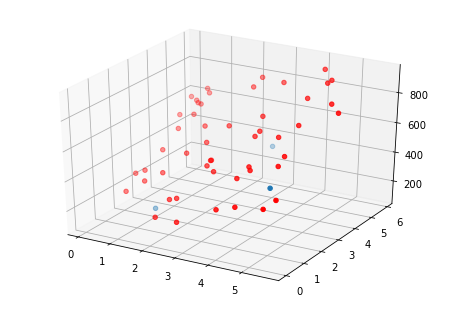

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
xn = np.array(x)
fig, ax = plt.subplots()
ax = Axes3D(fig)
# data
ax.scatter(xn[:, 0], xn[:, 1], y)
# regression line
reg_x1 = np.random.rand(50) * 6 # randint in (0, 6)
reg_x2 = np.random.rand(50) * 6 # randint in (0, 6)
reg =  np.sum(np.array(theta) * np.array(np.hstack([np.c_[reg_x1], np.c_[reg_x2]])), axis=1)
ax.scatter(reg_x1, reg_x2, reg, color='red')
fig.show()

## numpyを使った場合

データをnp.arrayで表す

2次元の行列である $x$ もnp.arrayを使っていることがポイント。np.matrixだとnp.arrayとの計算ができなくなるため。

In [67]:
# settings
import numpy as np
m = 3
theta = np.array([1.0, 1.0])
x = np.array([[1, 2], [3, 5], [4, 3]])
y = np.array([1, 4, 3])
alpha = 0.1

$\sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i))}\right)x_j^{(i)}$ の結果を保存する変数 sum0, sum1を用意

In [68]:
# container for results
sum0 = 0.0
sum1 = 0.0

deltaが一発で計算できる。

x1の列を取り出したいときは x[:, 0]とすれば良い。

for文を使わず、c言語で記述されたdot計算が行われるので高速になる。

In [69]:
delta = np.dot(x, theta) - y
sum0 = np.dot(delta, x[:, 0])
sum1 = np.dot(delta, x[:, 1])

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


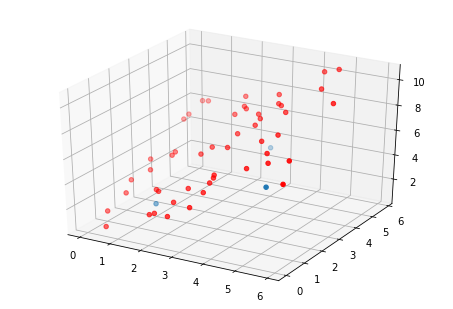

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots()
ax = Axes3D(fig)
# data
ax.scatter(x[:, 0], x[:, 1], y)
# regression line
reg_x1 = np.random.rand(50) * 6 # randint in (0, 6)
reg_x2 = np.random.rand(50) * 6 # randint in (0, 6)
reg =  np.sum(np.array(theta) * np.array(np.hstack([np.c_[reg_x1], np.c_[reg_x2]])), axis=1)
ax.scatter(reg_x1, reg_x2, reg, color='red')
fig.show()